1. 輸入資料庫
2. 分測試訓練資料
3. 調整輸入格式
4. 歸一
5. label調整輸出格式
6. 建立cnn(打開，設定隱藏層)

hidden layer : 4

neurons : 3 6 9 12

filter size : 5 x 5

pooling size : 2 x 2

7. 拉平再輸入到fully connected nn
8. compile
9. fit
10. 印出結果


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.datasets import mnist

/Users/wuyouxin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [31]:
x_train= x_train.reshape(60000,28,28,1)
x_test= x_test.reshape(10000,28,28,1)

In [34]:
x_train.shape

(60000, 28, 28, 1)

Ans: 3


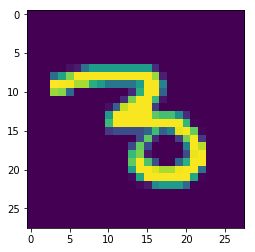

In [33]:
plt.imshow(x_train[30].reshape(28,28))
print("Ans:",y_train[30])

In [34]:
x_train=x_train/255
x_test=x_test/255

In [35]:
print(x_train[30].min())
print(x_train[30].max())

0.0
1.0


In [36]:
from keras.utils import np_utils

In [37]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [38]:
y_train[30]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [42]:
model= Sequential()

In [46]:
model.add(Conv2D(3,(5,5), padding="same", input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(6,(5,5), padding="same", input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(9,(5,5), padding="same", input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(12,(5,5), padding="same", input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))


In [47]:
model.compile(loss="mse",optimizer=SGD(lr=0.05),metrics=["accuracy"])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 3)         78        
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 3)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 6)         456       
_________________________________________________________________
activation_8 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 6)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 9)           1359      
__________

In [49]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 29s 487us/step - loss: 0.0897 - acc: 0.1678
Epoch 2/10
60000/60000 [==============================] - 28s 461us/step - loss: 0.0892 - acc: 0.2523
Epoch 3/10
60000/60000 [==============================] - 28s 462us/step - loss: 0.0881 - acc: 0.2682
Epoch 4/10
60000/60000 [==============================] - 28s 475us/step - loss: 0.0835 - acc: 0.3440
Epoch 5/10
60000/60000 [==============================] - 28s 473us/step - loss: 0.0623 - acc: 0.5825
Epoch 6/10
60000/60000 [==============================] - 28s 459us/step - loss: 0.0415 - acc: 0.7239
Epoch 7/10
60000/60000 [==============================] - 28s 464us/step - loss: 0.0350 - acc: 0.7659
Epoch 8/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.0311 - acc: 0.7921
Epoch 9/10
60000/60000 [==============================] - 27s 457us/step - loss: 0.0285 - acc: 0.8085
Epoch 10/10
60000/60000 [==============================] - 28s 467us/step - loss: 

In [50]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 296us/step


In [52]:
print('loss: ',score[0])
print('accuracy: ',score[1])

loss:  0.018938079940155148
accuracy:  0.8785
